####Парсинг данных

In [ ]:
import time
import pandas as pd
import requests
import datetime
from bs4 import BeautifulSoup as bs
from tqdm import tqdm

In [ ]:
df = {
      "id": [],
      "project": [],
      "project_nick": [],
      "type": [],
      "category": [],
      "title": [],
      "body": [],
      "publish_date": [],
      "publish_date_t": [],
      "fronturl": [],
      "picture": [],
      "badge": [],
      "pay_option": [],
      "data": [],
      "_score": [],
      "text": [],
      "shows": []
    }

date = datetime.datetime(2024, 1, 1)
end_date = datetime.datetime(2024, 1, 31)
while date <= end_date:
    for i in tqdm(range(100), desc=date.strftime('%d.%m.%Y')):
        url = f"https://www.rbc.ru/search/ajax/?project=rbcnews&dateFrom={date.strftime('%d.%m.%Y')}&dateTo={date.strftime('%d.%m.%Y')}&page={i}&query=&material="

        response = requests.get(url)
        if str(response) != '<Response [200]>':
            continue
        response = response.json()['items']

        if len(response) == 0:
            break
        time.sleep(0.7)
        for j, item in enumerate(response):
            if item['badge'] == 'video':
                continue
            r = requests.get(item['fronturl'])
            time.sleep(0.5)
            shows = requests.get(f'https://www.rbc.ru/rbcmetr/stat/rbcnews/{item["id"]}')
            shows = shows.json()['show']
            time.sleep(0.3)
            text = None

            if str(r) == '<Response [200]>':
                soup = bs(r.text, features="lxml") # features="lxml" чтобы не было warning
                p_text = soup.find_all('p')
                #soup = bs(r.text, features="lxml") # features="lxml" чтобы не было warning
                #p_text = soup.find('div', {'class':"article__text article__text_free", 'itemprop':"articleBody"})
                #p_text = r_text.find_all('p')
                if p_text:
                    text = ' '.join(map(lambda x:
                                        x.text.replace('<br />','\n').strip(),
                                        p_text))
            for key in list(df.keys())[:-2]:
                df[key].append(item[key])
            df["text"].append(text)
            df['shows'].append(shows)
    time.sleep(10)

    date = date + datetime.timedelta(days=1)
df1 = pd.DataFrame(df)
df1.to_csv('january_data.csv')

####Работа с данными, которые мы запарсили

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
df = pd.concat([pd.read_csv('december_data.csv'), pd.read_csv('january_data.csv'), pd.read_csv('feb_data.csv'),
                pd.read_csv('mart_data.csv'),
                pd.read_csv('april_data.csv'), pd.read_csv('may_data.csv')], axis=0, ignore_index=True)
df.shape

(28257, 18)

In [ ]:
df.head()

,Unnamed: 0,id,project,project_nick,type,category,title,body,publish_date,publish_date_t,fronturl,picture,badge,pay_option,data,_score,text,shows
0,0,656a43b89a7947f48c77ad6e,РБК,rbcnews,short_news,Общество,Китай вернет на родину двух панд из Великобрит...,NaN,2023-12-01T23:57:12+03:00,1701464232,https://www.rbc.ru/rbcfreenews/656a43b89a7947f...,NaN,NaN,free,NaN,0,Новейшие практики цифрового обслуживания бизне...,2835
1,1,656a3a1d9a79474d4f95dc7f,РБК,rbcnews,article,Политика,Канал в Петербурге оштрафовали за пропаганду Л...,Телеканал Aiva два раза показал клип на песню ...,2023-12-01T23:34:58+03:00,1701462898,https://www.rbc.ru/politics/01/12/2023/656a3a1...,https://s0.rbk.ru/v6_top_pics/media/img/7/98/3...,NaN,free,NaN,0,Новейшие практики цифрового обслуживания бизне...,53615
2,2,656a37c49a7947094092b73a,РБК,rbcnews,short_news,Бизнес,Путин разрешил ЛУКОЙЛу купить долю UROC в «ЭЛ5...,NaN,2023-12-01T23:26:13+03:00,1701462373,https://www.rbc.ru/rbcfreenews/656a37c49a79470...,https://s0.rbk.ru/v6_top_pics/media/img/2/90/3...,NaN,free,NaN,0,Новейшие практики цифрового обслуживания бизне...,8590
3,3,656a2c899a79477b1afb2cc3,РБК,rbcnews,short_news,Политика,МИД проведет консультации после слов Пашиняна ...,NaN,2023-12-01T23:18:31+03:00,1701461911,https://www.rbc.ru/rbcfreenews/656a2c899a79477...,https://s0.rbk.ru/v6_top_pics/media/img/3/11/3...,NaN,free,NaN,0,Новейшие практики цифрового обслуживания бизне...,7134
4,4,656a316c9a794708005ed12f,РБК,rbcnews,article,Политика,США ввели санкции против трех танкеров за нару...,Санкции введены против трех компаний из Либери...,2023-12-01T22:56:37+03:00,1701460597,https://www.rbc.ru/politics/01/12/2023/656a316...,https://s0.rbk.ru/v6_top_pics/media/img/7/00/3...,NaN,free,NaN,0,Новейшие практики цифрового обслуживания бизне...,12169


In [ ]:
df.isna().sum()

Unnamed: 0            0
id                    0
project               0
project_nick          0
type                  0
category             41
title                 0
body              12193
publish_date          0
publish_date_t        0
fronturl              0
picture            1972
badge             28257
pay_option            0
data              28257
_score                0
text                  1
shows                 0
dtype: int64

In [ ]:
df.nunique()

Unnamed: 0         5237
id                28248
project               1
project_nick          1
type                  9
category              9
title             27974
body              16025
publish_date      28233
publish_date_t    28233
fronturl          28257
picture           26283
badge                 0
pay_option            1
data                  0
_score                1
text              28226
shows             19480
dtype: int64

In [ ]:
#удаляем ненужные столбцы
#df.drop(['Unnamed: 0', 'id','project', 'project_nick', 'publish_date_t', 'fronturl', 'picture', 'badge', 'pay_option', 'data', '_score'], axis=1, inplace=True)

In [ ]:
df.drop(['Unnamed: 0', 'id','project', 'project_nick', 'publish_date_t', 'fronturl', 'badge', 'pay_option', 'data', '_score'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

type                0
category           41
title               0
body            12193
publish_date        0
picture          1972
text                1
shows               0
dtype: int64

#### Заполнение пропусков

In [ ]:
# заполним пропуски в body информацией из title
df['body'].fillna(df['title'], inplace=True)

In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
#обработка остальных значений NaN
#df.dropna(subset=['category'], inplace=True)
df.fillna('-', inplace=True)

df.isna().any().any(), df.shape

(False, (28256, 8))

преобразование призн:
- тип, категория - в числа
- новые признаки - из даты: дата, месяц, время, день недели, часть дня (утро, день, вечер, ночь)*

Преобразование признаков

In [ ]:
df.shows.max()

6879956

In [ ]:
df[df.shows == df.shows.max()]

,type,category,title,body,publish_date,picture,text,shows
26898,article,Политика,Военная операция на Украине. Карта на 23 мая,Россия начала военную операцию на Украине 24 ф...,2024-05-23T18:13:53+03:00,https://s0.rbk.ru/v6_top_pics/media/img/4/13/7...,Новейшие практики цифрового обслуживания бизне...,6879956


In [ ]:
# убираем стандартное начало и конец статьи (встречается во всех строках, видимо это реклама)))
df['text'] = df['text'].str.replace('Новейшие практики цифрового обслуживания бизнеса Обслуживание счета Снятие в банкоматах Переводы физлицам Реклама.\xa0ПАО «Промсвязьбанк».\r\nГенеральная лицензия Банка России № 3251. ', '', regex=True)
df['text'] = df['text'].str.replace('Упал — поднялся.\r\nКак быстро восстановить бизнес после кибератак Заряд для автопрома. Как развивается индустрия электромобилей Притяжение Арктики. Как туристический бренд помогает развивать индустрию путешествий Барометр отрасли: рыболовство и аквакультура Эпоха ренессанса.\r\nЧто движет российский рынок лизинга Азиатский уклон: новые перспективные пути для экспорта российских технологий Цифровой кодекс:\r\nкак будет выглядеть новая концепция регулирования ИКТ Как развиваются промышленные кластеры в России и чем они выгодны бизнесу и регионам Пять глобальных технотрендов в области искусственного интеллекта Как избежать коммуникативных трудностей в распределённой команде Реклама, ПАО Сбербанк Новейшие практики цифрового обслуживания бизнеса Обслуживание счета Снятие в банкоматах Переводы физлицам Реклама.\xa0ПАО «Промсвязьбанк».\r\nГенеральная лицензия Банка России № 3251.', '', regex=True)

In [ ]:
df['text'] = df['text'].str.replace('\xa0', ' ')

In [ ]:
pattern = 'Новейшие практики цифрового обслуживания бизнеса Обслуживание счета Снятие в банкоматах Переводы физлицам Реклама. ПАО «Промсвязьбанк».\r\nГенеральная лицензия Банка России № 3251.'

In [ ]:
df['text'] = df['text'].str.replace(' Новейшие практики цифрового обслуживания бизнеса Обслуживание счета Снятие в банкоматах Переводы физлицам Реклама. ПАО «Промсвязьбанк».\r\nГенеральная лицензия Банка России № 3251.', '')

In [ ]:
# преобразовываем признак времени публикации
df['publish_date'] = pd.to_datetime(df['publish_date'])

# для дальнейшего анализа, создадим столбец с месяцем публикации
df['month'] = df['publish_date'].dt.month

# для дальнейшего анализа, создадим столбец с часом публикации
df['time'] = df['publish_date'].dt.hour

In [ ]:
df.head()

,type,category,title,body,publish_date,picture,text,shows,month,time
0,short_news,Общество,Китай вернет на родину двух панд из Великобрит...,Китай вернет на родину двух панд из Великобрит...,2023-12-01 23:57:12+03:00,-,Две гигантские панды Саншай и Тянь Тянь вернут...,2835,12,23
1,article,Политика,Канал в Петербурге оштрафовали за пропаганду Л...,Телеканал Aiva два раза показал клип на песню ...,2023-12-01 23:34:58+03:00,https://s0.rbk.ru/v6_top_pics/media/img/7/98/3...,Суд в Санкт-Петербурге оштрафовал телевизионну...,53615,12,23
2,short_news,Бизнес,Путин разрешил ЛУКОЙЛу купить долю UROC в «ЭЛ5...,Путин разрешил ЛУКОЙЛу купить долю UROC в «ЭЛ5...,2023-12-01 23:26:13+03:00,https://s0.rbk.ru/v6_top_pics/media/img/2/90/3...,Президент Владимир Путин разрешил ЛУКОЙЛу прио...,8590,12,23
3,short_news,Политика,МИД проведет консультации после слов Пашиняна ...,МИД проведет консультации после слов Пашиняна ...,2023-12-01 23:18:31+03:00,https://s0.rbk.ru/v6_top_pics/media/img/3/11/3...,Власти Армении обращались к российской стороне...,7134,12,23
4,article,Политика,США ввели санкции против трех танкеров за нару...,Санкции введены против трех компаний из Либери...,2023-12-01 22:56:37+03:00,https://s0.rbk.ru/v6_top_pics/media/img/7/00/3...,США ввели санкции против трех компаний-судовла...,12169,12,22


In [ ]:
df.shape

(28256, 10)

In [ ]:
np.array(df.text.unique()).shape

(28225,)

## EDA


### Первчный анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28256 entries, 0 to 28256
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   type          28256 non-null  object                   
 1   category      28256 non-null  object                   
 2   title         28256 non-null  object                   
 3   body          28256 non-null  object                   
 4   publish_date  28256 non-null  datetime64[ns, UTC+03:00]
 5   picture       28256 non-null  object                   
 6   text          28256 non-null  object                   
 7   shows         28256 non-null  int64                    
 8   month         28256 non-null  int32                    
 9   time          28256 non-null  int32                    
dtypes: datetime64[ns, UTC+03:00](1), int32(2), int64(1), object(6)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,shows,month,time
count,2.825600e+04,28256.000000,28256.000000
mean,2.157533e+04,4.438491,12.796326
std,5.606238e+04,3.416404,6.061540
min,4.000000e+01,1.000000,0.000000
25%,4.786750e+03,2.000000,9.000000
50%,1.058700e+04,4.000000,13.000000
75%,2.452125e+04,5.000000,17.000000
max,6.879956e+06,12.000000,23.000000


In [ ]:
df.describe(include = ['object'])

,type,category,title,body,picture,text
count,28256,28256,28256,28256,28256,28256
unique,9,10,27973,28017,26283,28225
top,article,Политика,В Белгороде объявили ракетную опасность,В Белгороде объявили ракетную опасность,-,
freq,15971,13686,25,20,1972,12


### Анализ целевой переменной

#### Работа с выбросами

<Axes: ylabel='shows'>

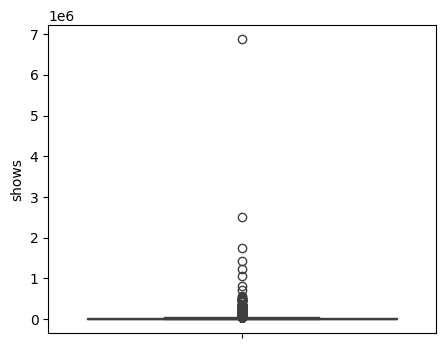

In [ ]:
plt.figure(figsize=(5, 4))

sns.boxplot(data=df['shows'])

**Вывод.** В нашем случае в столбце shows присутствует значительное количество признаков

In [ ]:
# Рассчитаем первый и третий квартили поля shows или возьмем значения из вывода метода describe
first_quartile = df['shows'].describe()['25%']
third_quartile = df['shows'].describe()['75%']

# Рассчитаем IQR как разницу между третьим и первым квартилями
iqr = third_quartile - first_quartile

In [ ]:
condition = (df['shows'] > (first_quartile - 3 * iqr)) & (df['shows'] < (third_quartile + 3 * iqr))
condition

0        True
1        True
2        True
3        True
4        True
         ... 
28252    True
28253    True
28254    True
28255    True
28256    True
Name: shows, Length: 28256, dtype: bool

In [ ]:
df = df[condition]

In [ ]:
df[~condition].sort_values('shows',  ascending=False)[df.category == 'Бизнес']

,type,category,title,body,publish_date,picture,text,shows,month,time


<Axes: ylabel='shows'>

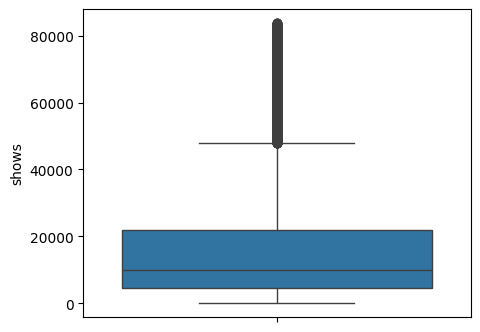

In [ ]:
plt.figure(figsize=(5, 4))

sns.boxplot(data=df['shows'])

### Анализ нецелевых переменных

**Проанализируем тип (столбец type)**

In [ ]:
df.type.value_counts()

type
article        15050
short_news     11743
person           196
photoreport       93
story             41
opinion           21
interview         20
rating             1
Name: count, dtype: int64

In [ ]:
df.groupby('type')['shows'].mean()

type
article        20204.465515
interview      22166.850000
opinion        19951.619048
person          5677.005102
photoreport    23488.913978
rating          3754.000000
short_news     11795.086264
story          13044.414634
Name: shows, dtype: float64

In [ ]:
df_title = df.groupby(['type','month'])['title'].count()
pd.DataFrame(df_title)

title
type        month       
article     1       2226
            2       2379
            3       2692
            4       2802
            5       2723
            12      2228
interview   1          3
            2          2
            3          3
            4          1
            5          4
            12         7
opinion     2          2
            3          4
            4          6
            5          1
            12         8
person      1         49
            2         34
            3         33
            4         24
            5         29
            12        27
photoreport 1         23
            2         11
            3         14
            4         13
            5         19
            12        13
rating      5          1
short_news  1       1636
            2       1929
            3       2020
            4       2223
            5       2199
            12      1736
story       1          2
            2          5
            3          3
            4         12
            5          5
            12        14

- Рейтинг - категория впервые вышла в мае, ее можно убрать из рассмотрения
- Стори / Онлайн - мало таких статей, но по ним очень много просмотров!!, убираем из рассмотрения
- Опинион / Интервью - мало статей каждый месяц, набирают в среднем не оч много просмотров, убираем из рассмотрения
- Фоторепорт - мало статей, но набирают достаточно много просмотров, убираем из рассмотрения
- Персон - относительно мало статей (0.7% от общего кол-ва), набирают относительно мало просмотров, убираем из рассмотрения

**Проанализируем категорию (столбец category)**

In [ ]:
df.category.value_counts()

category
Политика              13036
Общество               6188
Спорт                  4289
Бизнес                 1294
Экономика               883
Технологии и медиа      835
Финансы                 581
-                        38
Авто                     17
Свое дело                 4
Name: count, dtype: int64

In [ ]:
df.groupby('category')['shows'].mean()

category
-                     11412.473684
Авто                  10846.823529
Бизнес                20790.034776
Общество              16832.585650
Политика              19164.722691
Свое дело             20109.750000
Спорт                  5060.991840
Технологии и медиа    16922.116168
Финансы               21951.895009
Экономика             19368.257078
Name: shows, dtype: float64

In [ ]:
df_cat = df.groupby([ 'category', 'month'])['title'].count()
pd.DataFrame(df_cat)

title
category           month       
-                  1          2
                   2          4
                   3          3
                   4         12
                   5          5
                   12        12
Авто               2          2
                   3          3
                   4          4
                   5          7
                   12         1
Бизнес             1        173
                   2        217
                   3        249
                   4        241
                   5        185
                   12       229
Общество           1       1023
                   2        865
                   3       1010
                   4       1322
                   5        948
                   12      1020
Политика           1       1691
                   2       2118
                   3       2353
                   4       2315
                   5       2754
                   12      1805
Свое дело          1          3
                   2          1
Спорт              1        688
                   2        730
                   3        767
                   4        812
                   5        754
                   12       538
Технологии и медиа 1        133
                   2        143
                   3        150
                   4        156
                   5        119
                   12       134
Финансы            1         71
                   2        129
                   3        104
                   4         94
                   5         73
                   12       110
Экономика          1        155
                   2        153
                   3        130
                   4        125
                   5        136
                   12       184

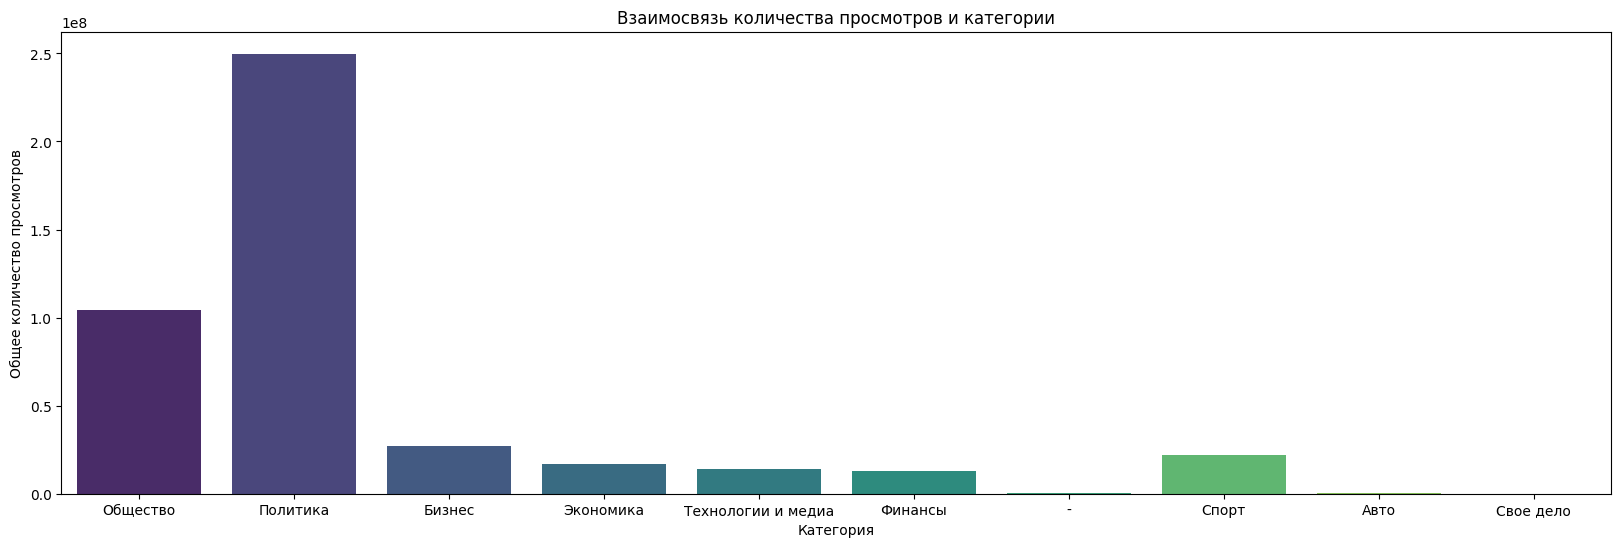

In [ ]:
plt.figure(figsize=(20, 6))

sns.barplot(data=df, x='category', y='shows', estimator=sum, ci=None, palette='viridis')

plt.title('Взаимосвязь количества просмотров и категории')
plt.xlabel('Категория')
plt.ylabel('Общее количество просмотров')

plt.show()

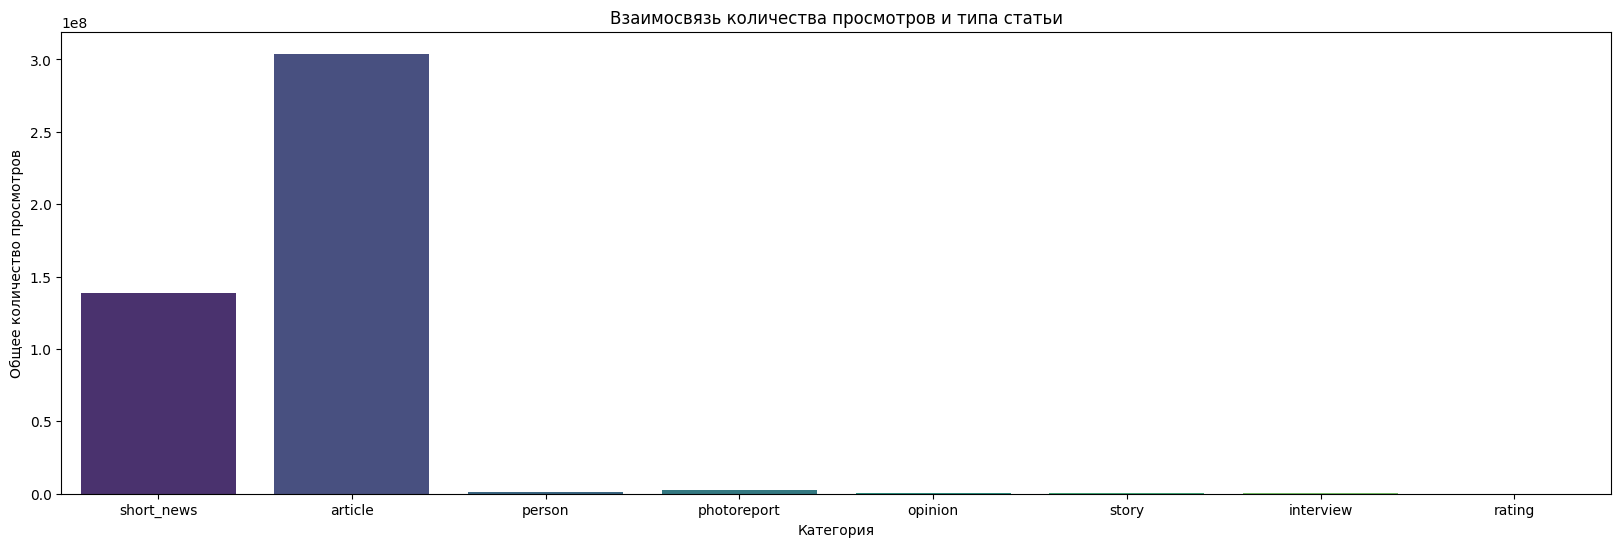

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='type', y='shows', estimator=sum, ci=None, palette='viridis')
plt.title('Взаимосвязь количества просмотров и типа статьи')
plt.xlabel('Категория')
plt.ylabel('Общее количество просмотров')
plt.show()

**Вывод.** Читатели больше всего интересуются статьями о полтике.

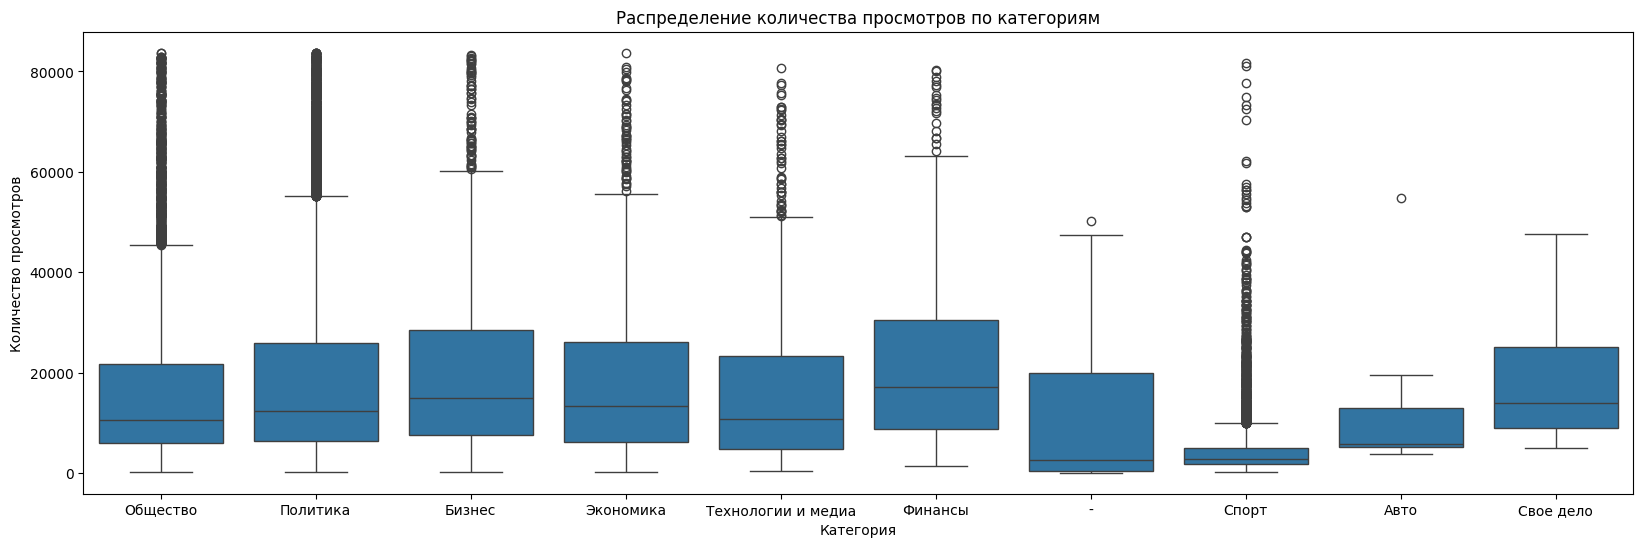

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='category', y='shows')
plt.title('Распределение количества просмотров по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество просмотров')
plt.show()

In [ ]:
mean_shows_by_category = df.groupby('category')['shows'].median().reset_index()

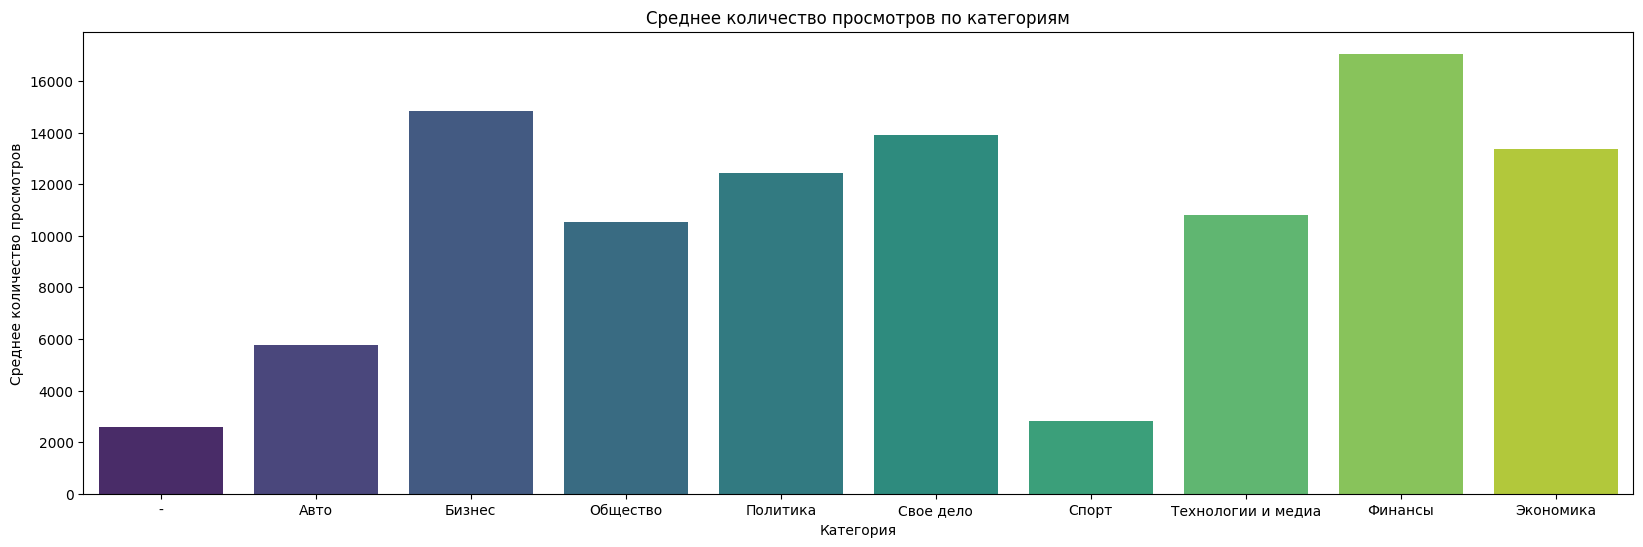

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=mean_shows_by_category, x='category', y='shows', palette='viridis')
plt.title('Среднее количество просмотров по категориям')
plt.xlabel('Категория')
plt.ylabel('Среднее количество просмотров')
plt.show()

In [ ]:
from scipy import stats

In [ ]:
# Проведение ANOVA для проверки значимых различий между категориями статей
anova_result = stats.f_oneway(
    df[df['category'] == 'Финансы']['shows'],
    df[df['category'] == 'Политика']['shows']
)
print("Результаты ANOVA теста:")
print(f"F-статистика: {anova_result.statistic}, p-значение: {anova_result.pvalue}")

Результаты ANOVA теста:
F-статистика: 13.542840101034091, p-значение: 0.00023407904216016579


In [ ]:
mean_shows_by_type = df.groupby('type')['shows'].median().reset_index()

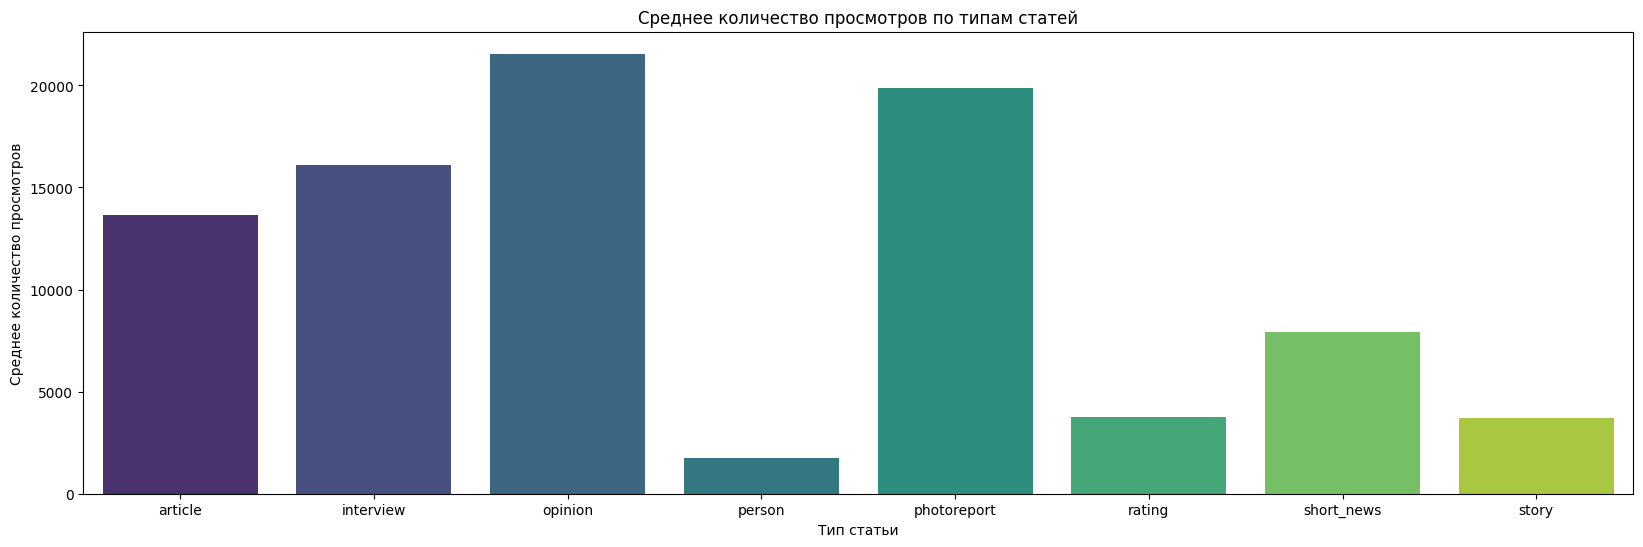

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=mean_shows_by_type, x='type', y='shows', palette='viridis')
plt.title('Среднее количество просмотров по типам статей')
plt.xlabel('Тип статьи')
plt.ylabel('Среднее количество просмотров')
plt.show()

In [ ]:
# Проведение ANOVA для проверки значимых различий между типами статей
anova_result = stats.f_oneway(
    df[df['type'] == 'article']['shows'],
    df[df['type'] == 'short_news']['shows']
)
print("Результаты ANOVA теста:")
print(f"F-статистика: {anova_result.statistic}, p-значение: {anova_result.pvalue}")

Результаты ANOVA теста:
F-статистика: 1711.2401283019635, p-значение: 0.0


#### Влияние категориальной переменной на целевую

In [ ]:
# Создадим список types с названиями категорий зданий с более, чем 100 измерениями
types = df.dropna(subset=['shows'])
types = types['category'].value_counts()
types = list(types[types.values > 100].index)

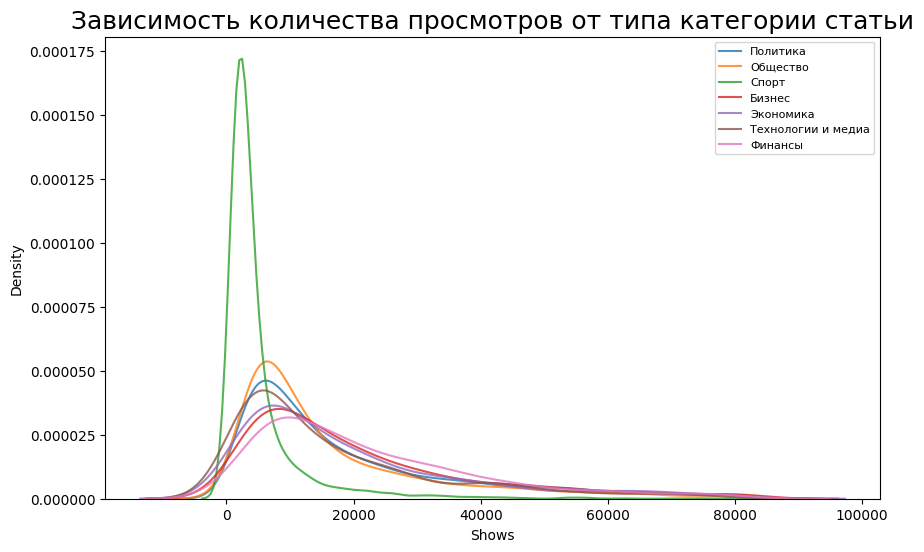

In [ ]:
plt.figure(figsize=(10, 6))

# Постройте на одном графике распределения оценок для каждой категории из списка types
for b_type in types:
    subset = df[df['category'] == b_type]
    sns.kdeplot(subset['shows'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Shows')
plt.ylabel('Density')
plt.title('Зависимость количества просмотров от типа категории статьи', size = 18)
plt.legend(fontsize=8)

plt.show()

**Комментарий.** Спортом интересуются значительно меньше, чем всеми остальными категориями

In [ ]:
# Создадим список types с названиями категорий статей с более, чем 10 измерениями
types = df.dropna(subset=['type'])
types = types['type'].value_counts()
types = list(types[types.values > 10].index)

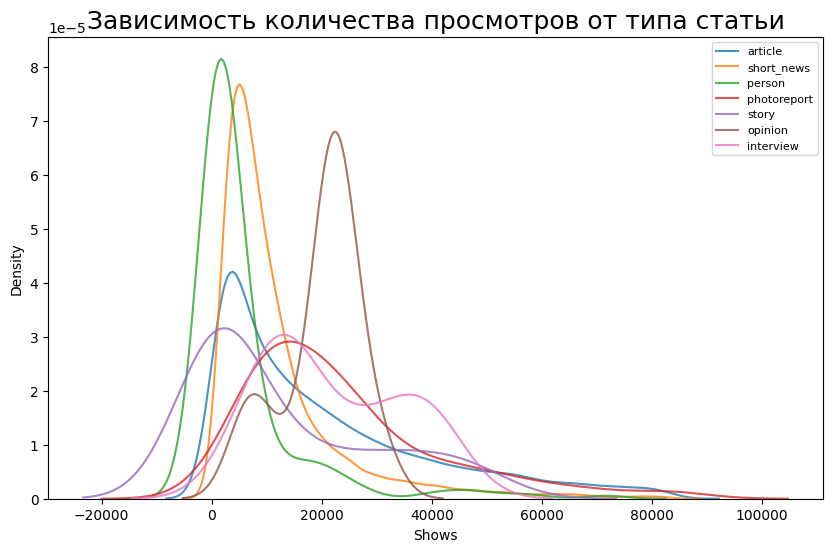

In [ ]:
plt.figure(figsize=(10, 6))

# Постройте на одном графике распределения оценок для каждого типа статьи из списка types
for b_type in types:
    subset = df[df['type'] == b_type]
    sns.kdeplot(subset['shows'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Shows')
plt.ylabel('Density')
plt.title('Зависимость количества просмотров от типа статьи', size = 18)
plt.legend(fontsize=8)

plt.show()

**Вывод.** Количество просмотров не зависит от типа статьи и категории статьи

In [ ]:
# Создадим список types с порядковыми числами месяцев с более, чем 0 измерениями
types = df.dropna(subset=['month'])
types = types['month'].value_counts()
types = list(types[types.values > 0].index)

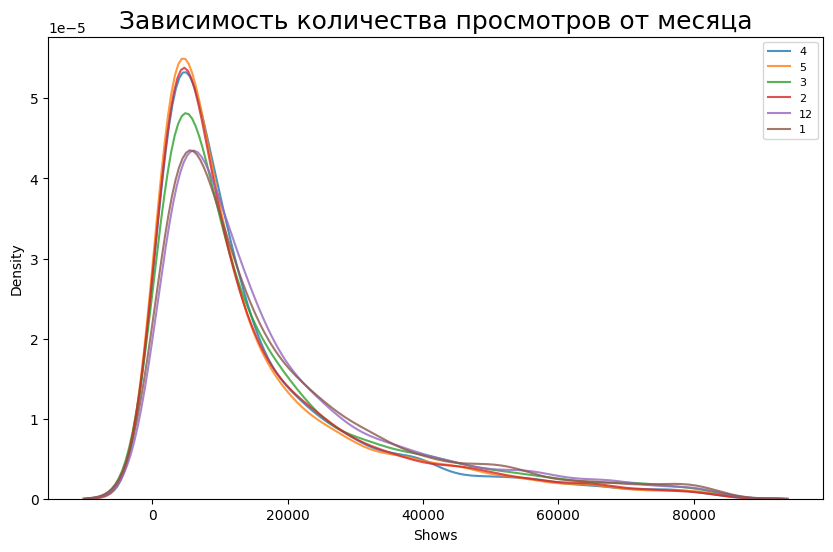

In [ ]:
plt.figure(figsize=(10, 6))

# Постройте на одном графике распределения оценок для каждого месяца из списка types
for b_type in types:
    subset = df[df['month'] == b_type]
    sns.kdeplot(subset['shows'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Shows')
plt.ylabel('Density')
plt.title('Зависимость количества просмотров от месяца', size = 18)
plt.legend(fontsize=8)

plt.show()

In [ ]:
df.time.value_counts()

time
12    1808
13    1744
15    1712
14    1711
11    1573
10    1571
16    1569
17    1510
18    1354
19    1282
20    1219
21    1213
9     1065
0      952
8      879
22     876
23     763
7      752
1      650
6      627
5      604
2      603
3      569
4      559
Name: count, dtype: int64

In [ ]:
types = df.dropna(subset=['time'])
types = types['time'].value_counts()
types = list(types[types.values > 10].index)

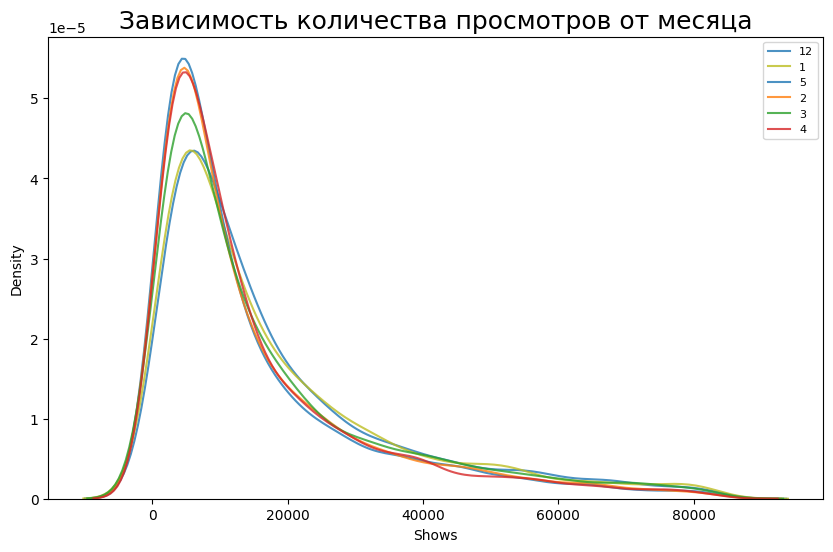

In [ ]:
plt.figure(figsize=(10, 6))

# Постройте на одном графике распределения оценок для каждого месяца из списка types
for b_type in types:
    subset = df[df['month'] == b_type]
    sns.kdeplot(subset['shows'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Shows')
plt.ylabel('Density')
plt.title('Зависимость количества просмотров от месяца', size = 18)
plt.legend(fontsize=8)

plt.show()

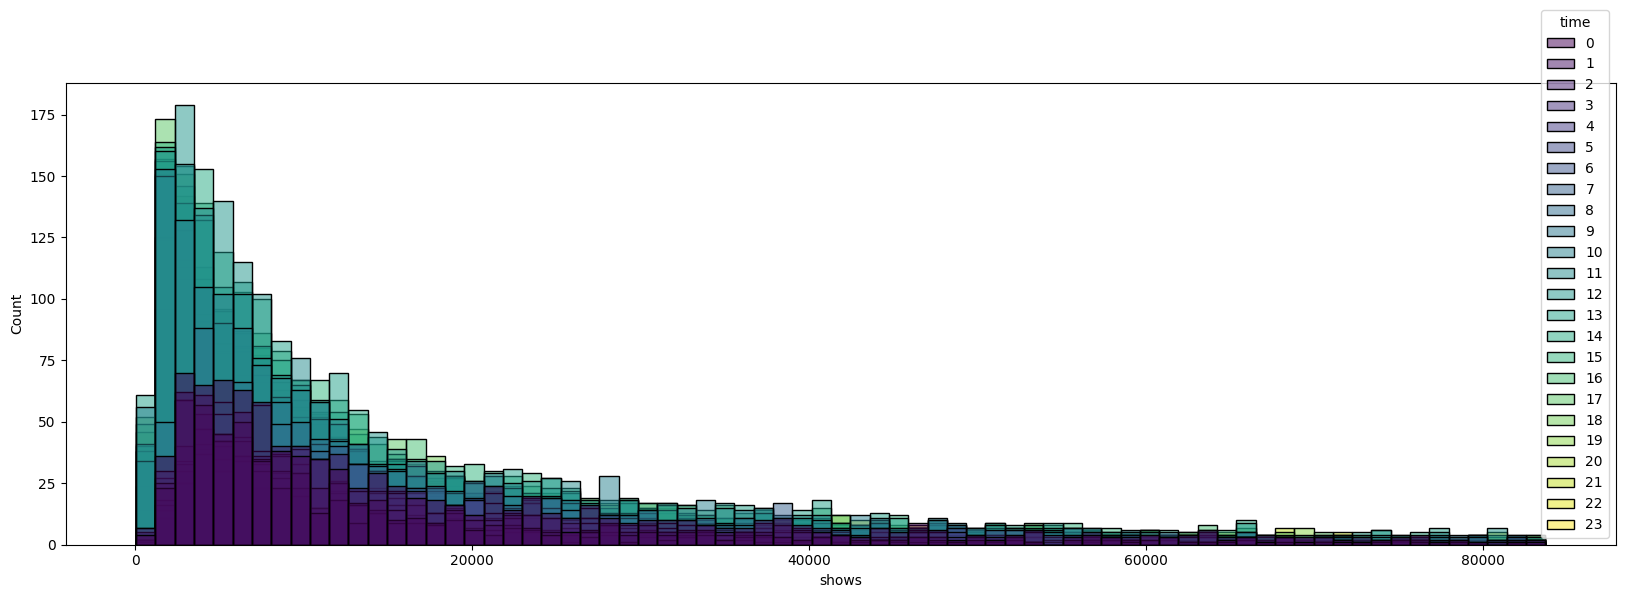

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='shows', hue='time', palette='viridis', discrete=False)
plt.show()

In [ ]:
df[['time', 'shows']].corr()

,time,shows
time,1.000000,-0.034625
shows,-0.034625,1.000000


In [ ]:
mean_shows_by_hour = df.groupby('time')['shows'].median().reset_index()

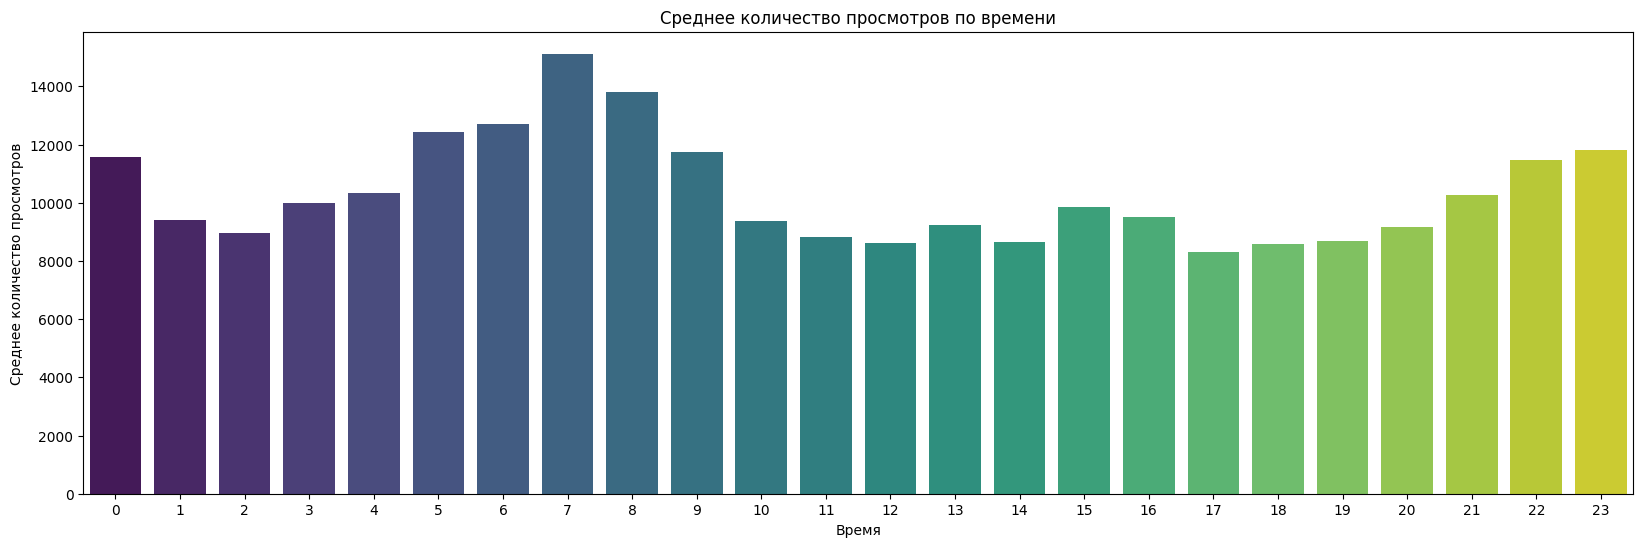

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=mean_shows_by_hour, x='time', y='shows', palette='viridis')
plt.title('Среднее количество просмотров по времени')
plt.xlabel('Время')
plt.ylabel('Среднее количество просмотров')
plt.show()

**Комментарий.** Максимально среднее число просмотров утром и днем.

In [ ]:
df.head()

,type,category,title,body,publish_date,picture,text,shows,month,time
0,short_news,Общество,Китай вернет на родину двух панд из Великобрит...,Китай вернет на родину двух панд из Великобрит...,2023-12-01 23:57:12+03:00,-,Две гигантские панды Саншай и Тянь Тянь вернут...,2835,12,23
1,article,Политика,Канал в Петербурге оштрафовали за пропаганду Л...,Телеканал Aiva два раза показал клип на песню ...,2023-12-01 23:34:58+03:00,https://s0.rbk.ru/v6_top_pics/media/img/7/98/3...,Суд в Санкт-Петербурге оштрафовал телевизионну...,53615,12,23
2,short_news,Бизнес,Путин разрешил ЛУКОЙЛу купить долю UROC в «ЭЛ5...,Путин разрешил ЛУКОЙЛу купить долю UROC в «ЭЛ5...,2023-12-01 23:26:13+03:00,https://s0.rbk.ru/v6_top_pics/media/img/2/90/3...,Президент Владимир Путин разрешил ЛУКОЙЛу прио...,8590,12,23
3,short_news,Политика,МИД проведет консультации после слов Пашиняна ...,МИД проведет консультации после слов Пашиняна ...,2023-12-01 23:18:31+03:00,https://s0.rbk.ru/v6_top_pics/media/img/3/11/3...,Власти Армении обращались к российской стороне...,7134,12,23
4,article,Политика,США ввели санкции против трех танкеров за нару...,Санкции введены против трех компаний из Либери...,2023-12-01 22:56:37+03:00,https://s0.rbk.ru/v6_top_pics/media/img/7/00/3...,США ввели санкции против трех компаний-судовла...,12169,12,22


####Кодирование текста, лемматизация, векторизация

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('russian'))

In [ ]:
# https://www.kaggle.com/code/alxmamaev/how-to-easy-preprocess-russian-text

#!pip install pymystem3
nltk.download("stopwords", quiet=True)
from pymystem3 import Mystem
from string import punctuation
from typing import  List

# Create lemmatizer and stopwords list
mystem = Mystem()
russian_stopwords = stopwords.words("russian")

# Preprocess function
def preprocess_text(text: str) -> List[str]:
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords
              and len(token) > 2
              and not(any(str.isdigit(i) for i in token))
              and not(any(p in token for p in punctuation))
              and not(any(p in token for p in [' ', '‑', '–', '«','»', '\n']))]

    #text = " ".join(tokens)
    #return text

    return tokens

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(tokenizer=preprocess_text)
# X = vectorizer.fit_transform(df.text)

# token = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
# print('start: ', token.shape)
# a = pd.DataFrame(token.sum())
# b = a[a[0]<4]
# col_to_drop = list(b.index)
# token.drop(col_to_drop, axis=1, inplace=True)
# print('fin: ', token.shape)

In [ ]:
# df = pd.concat([df, token], axis=1)
# df

###LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train, test = train_test_split(df, test_size=0.3, random_state=42)

vectorizer = CountVectorizer(tokenizer=preprocess_text)
Xtrain = vectorizer.fit_transform(train.text)
Xtest = vectorizer.transform(test.text)

scaler = StandardScaler()
ytrain = scaler.fit_transform(train['shows'].to_numpy().reshape(-1, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
pred = scaler.inverse_transform(pred.reshape(-1, 1))

print('RMSE text with LR: ' , mean_squared_error(test['shows'], pred) ** (0.5))
print('MAE test with LR: ' , mean_absolute_error(test['shows'], pred))

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

vectorizer = CountVectorizer(tokenizer=preprocess_text)
Xtrain = vectorizer.fit_transform(train.title)
Xtest = vectorizer.transform(test.title)

scaler = StandardScaler()
ytrain = scaler.fit_transform(train['shows'].to_numpy().reshape(-1, 1))

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
pred = scaler.inverse_transform(pred.reshape(-1, 1))

print('RMSE title with LR: ' , mean_squared_error(test['shows'], pred) ** (0.5))
print('MAE title with LR: ' , mean_absolute_error(test['shows'], pred))

####Простейшая нейронная сеть

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import random
import os

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(48)

In [ ]:
#Проведем лемматизацию и отделим слова друг от друга
import nltk
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from typing import  List

In [ ]:
# Create lemmatizer and stopwords list
mystem = Mystem()
russian_stopwords = stopwords.words("russian")

# Preprocess function
def preprocess_text(text: str) -> List[str]:
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords
              and len(token) > 2
              and not(any(str.isdigit(i) for i in token))
              and not(any(p in token for p in punctuation))
              and not(any(p in token for p in [' ', '‑', '–', '«','»', '\n']))]

    #text = " ".join(tokens)
    #return text

    return ' '.join(tokens)

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
from transformers import BertTokenizer, BertModel

####Очистка слов и преобразование леммоформ

In [ ]:
#почистили в новую колонку слова
df['new_text'] = df['text'].apply(preprocess_text)

In [ ]:
df['new_title'] = df['title'].apply(preprocess_text)

In [ ]:
df.head(2)

,type,category,title,body,publish_date,picture,text,shows,month,time,new_text,new_title
0,short_news,Общество,Китай вернет на родину двух панд из Великобрит...,Китай вернет на родину двух панд из Великобрит...,2023-12-01 23:57:12+03:00,-,Две гигантские панды Саншай и Тянь Тянь вернут...,2835,12,23,гигантский панда саншай тянь тянь вернуться ки...,китай вернуть родина панда великобритания
1,article,Политика,Канал в Петербурге оштрафовали за пропаганду Л...,Телеканал Aiva два раза показал клип на песню ...,2023-12-01 23:34:58+03:00,https://s0.rbk.ru/v6_top_pics/media/img/7/98/3...,Суд в Санкт-Петербурге оштрафовал телевизионну...,53615,12,23,суд оштрафовать телевизионный компания аив ста...,канал петербург оштрафовать пропаганда лгбт по...


In [ ]:
df['all'] = df['type'] + df['category'] + df['new_title'] + df['new_text']

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to('cuda')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

####Токенизация от BERT

In [ ]:
#по сути функция будет делать токенизацию текста, можно и без нее, но дальше ее проще передавать
def encode_texts(texts, tokenizer, max_length=64):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    return encodings

In [ ]:
encodings = encode_texts(df['new_text'].tolist(), tokenizer).to('cuda')
input_ids = encodings['input_ids'].to('cuda') #векториз текст
attention_mask = encodings['attention_mask'].to('cuda')

In [ ]:
encodings_title = encode_texts(df['new_title'].tolist(), tokenizer, max_length=32).to('cuda')
attention_mask_title = encodings_title['attention_mask'].to('cuda')

In [ ]:
input_ids_title = encodings_title['input_ids'].to('cuda')

In [ ]:
encodingsall = encode_texts(df['all'].tolist(), tokenizer).to('cuda')
input_idsall = encodingsall['input_ids'].to('cuda') #векториз текст
attention_maskall = encodingsall['attention_mask'].to('cuda')

Например, если вы решаете задачу языкового моделирования, то наверняка захотите при помощи attention_mask замаскировать то, что модели надо предсказать (например, вторую половину предложения).



####LightGBM

In [ ]:
!pip install lightgbm --install-option=--gpu

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from scipy.stats import uniform, randint
from scipy.sparse import hstack
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

In [ ]:
X = input_ids.cpu().numpy()

In [ ]:
# Целевая переменная
y = df['shows'].values.reshape(-1, 1).astype(np.float32)

# Нормализация целевой переменной
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Создание модели градиентного бустинга
LightGBM_model = lgb.LGBMRegressor()

In [ ]:
# Настройка гиперпараметров для поиска по сетке
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 50),
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': [-1, 5, 10]
}

In [ ]:
# Поиск по сетке
grid_search = RandomizedSearchCV(estimator=LightGBM_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
grid_search.fit(X_train, y_train.ravel())

In [ ]:
# Лучшая модель в зависимости от гиперпараметров
best_LightGBM_model = grid_search.best_estimator_

In [ ]:
# Предсказание на тестовой выборке
y_pred = best_LightGBM_model.predict(X_test)

# Обратное преобразование нормализации
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# Оценка качества модели с использованием MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'MAE: {mae}')
print(f'Лучшие параметры: {grid_search.best_params_}')

Работа с титулами

In [ ]:
X = iput_ids.cpu().numpy()

In [ ]:
# Целевая переменная
y = df['shows'].values.reshape(-1, 1).astype(np.float32)

# Нормализация целевой переменной
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Создание модели градиентного бустинга
LightGBM_model = lgb.LGBMRegressor()

In [ ]:
# Настройка гиперпараметров для поиска по сетке
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 50),
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': [-1, 5, 10]
}

In [ ]:
# Поиск по сетке
grid_search = RandomizedSearchCV(estimator=LightGBM_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
grid_search.fit(X_train, y_train.ravel())

In [ ]:
# Лучшая модель в зависимости от гиперпараметров
best_LightGBM_model = grid_search.best_estimator_

In [ ]:
# Предсказание на тестовой выборке
y_pred = best_LightGBM_model.predict(X_test)

# Обратное преобразование нормализации
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# Оценка качества модели с использованием MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'MAE: {mae}')
print(f'Лучшие параметры: {grid_search.best_params_}')

Основные классы и класс нейронки, которую будем использовать далее

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc0 = nn.Linear(input_dim, input_dim)
        self.batchn0 = nn.BatchNorm1d(input_dim)
        self.fc1 = nn.Linear(input_dim, 128)
        self.drop = nn.Dropout(0.3)
        self.batchn1 = nn.BatchNorm1d(128)
        self.act = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 64)
        self.batchn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc0(x)
        x = self.drop(x)
        x = self.batchn0(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.batchn1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.batchn2(x)
        x = self.act(x)
        x = self.fc3(x)
        x = self.act(x)
        return x

Там чуть ниже будет код с работой с нейронкой с учетом эмбеддингов, полученных из Bert'a, здесь сделаем просто токены из берта и закинем в нейронку и lstm

####Текст и титлы без преобразования целевой переменной

In [ ]:
X = input_ids.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
modelr = RegressionModel(X_train.shape[1])
criterion = nn.L1Loss() #MAE
optimizer = optim.Adam(modelr.parameters(), lr=0.001)

In [ ]:
losses_val = []
losses_train = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    modelr.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = modelr(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    losses_train.append(train_loss)

    modelr.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = modelr(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    losses_val.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(modelr.state_dict(), 'best_model_lr.pth')

Epoch 1/30, Train Loss: 16331.6144, Validation Loss: 16160.3585
Epoch 2/30, Train Loss: 15715.7310, Validation Loss: 15306.3606
Epoch 3/30, Train Loss: 14774.3093, Validation Loss: 14350.2684
Epoch 4/30, Train Loss: 13817.3829, Validation Loss: 13426.6682
Epoch 5/30, Train Loss: 13007.8301, Validation Loss: 12678.2165
Epoch 6/30, Train Loss: 12415.3536, Validation Loss: 12169.9603
Epoch 7/30, Train Loss: 11980.4144, Validation Loss: 11955.9899
Epoch 8/30, Train Loss: 11740.5661, Validation Loss: 11815.6480
Epoch 9/30, Train Loss: 11607.4908, Validation Loss: 11736.4468
Epoch 10/30, Train Loss: 11561.4380, Validation Loss: 11707.0912
Epoch 11/30, Train Loss: 11543.3883, Validation Loss: 11705.3464
Epoch 12/30, Train Loss: 11535.8271, Validation Loss: 11708.4254
Epoch 13/30, Train Loss: 11526.4032, Validation Loss: 11705.3882
Epoch 14/30, Train Loss: 11519.1323, Validation Loss: 11696.7052
Epoch 15/30, Train Loss: 11525.9156, Validation Loss: 11698.0830
Epoch 16/30, Train Loss: 11519.555

Обучение для заголовков без всего

In [ ]:
X_title = input_ids_title.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_title, y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = CustomDataset(X_train_t, y_train_t)
test_dataset = CustomDataset(X_test_t, y_test_t)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
modelr_title = RegressionModel(X_train_t.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(modelr_title.parameters(), lr=0.001)

In [ ]:
losses_val_title = []
losses_train_title = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    modelr_title.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = modelr_title(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    losses_train_title.append(train_loss)

    modelr_title.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = modelr_title(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    losses_val_title.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(modelr_title.state_dict(), 'best_model_lr_title.pth')

Epoch 1/30, Train Loss: 16330.6614, Validation Loss: 16170.1518
Epoch 2/30, Train Loss: 15714.8893, Validation Loss: 15326.0018
Epoch 3/30, Train Loss: 14765.9427, Validation Loss: 14374.1048
Epoch 4/30, Train Loss: 13803.9606, Validation Loss: 13408.4262
Epoch 5/30, Train Loss: 12979.4425, Validation Loss: 12681.9375
Epoch 6/30, Train Loss: 12358.1703, Validation Loss: 12193.1322
Epoch 7/30, Train Loss: 11962.9193, Validation Loss: 11900.7298
Epoch 8/30, Train Loss: 11737.2891, Validation Loss: 11801.6353
Epoch 9/30, Train Loss: 11629.1299, Validation Loss: 11745.6814
Epoch 10/30, Train Loss: 11580.6166, Validation Loss: 11725.1723
Epoch 11/30, Train Loss: 11554.2010, Validation Loss: 11711.3268
Epoch 12/30, Train Loss: 11549.5813, Validation Loss: 11713.9532
Epoch 13/30, Train Loss: 11547.4076, Validation Loss: 11705.9257
Epoch 14/30, Train Loss: 11542.5898, Validation Loss: 11707.5823
Epoch 15/30, Train Loss: 11532.2992, Validation Loss: 11701.5287
Epoch 16/30, Train Loss: 11524.975

###Обучение токенезированного конкатенацией строк через bert tokenizer

In [ ]:
X_a = input_idsall.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = CustomDataset(X_train_a, y_train_a)
test_dataset = CustomDataset(X_test_a, y_test_a)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
modela = RegressionModel(X_train_a.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(modela.parameters(), lr=0.001)

In [ ]:
losses_val_a = []
losses_train_a = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    modela.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = modela(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    losses_train_a.append(train_loss)

    modela.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = modela(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    losses_val_a.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(modela.state_dict(), 'best_modela.pth')

Epoch 1/30, Train Loss: 16331.2765, Validation Loss: 16174.1743
Epoch 2/30, Train Loss: 15713.9287, Validation Loss: 15292.7466
Epoch 3/30, Train Loss: 14777.7280, Validation Loss: 14269.5596
Epoch 4/30, Train Loss: 13857.5628, Validation Loss: 13350.9773
Epoch 5/30, Train Loss: 13075.2602, Validation Loss: 12763.8778
Epoch 6/30, Train Loss: 12407.8129, Validation Loss: 12236.1840
Epoch 7/30, Train Loss: 11915.2757, Validation Loss: 11806.0993
Epoch 8/30, Train Loss: 11564.8878, Validation Loss: 11560.8693
Epoch 9/30, Train Loss: 11377.9125, Validation Loss: 11492.1319
Epoch 10/30, Train Loss: 11263.9668, Validation Loss: 11391.2464
Epoch 11/30, Train Loss: 11181.6334, Validation Loss: 11330.0303
Epoch 12/30, Train Loss: 11121.6167, Validation Loss: 11322.3228
Epoch 13/30, Train Loss: 11109.7093, Validation Loss: 11269.9826
Epoch 14/30, Train Loss: 11044.4052, Validation Loss: 11215.0850
Epoch 15/30, Train Loss: 11003.1580, Validation Loss: 11191.9019
Epoch 16/30, Train Loss: 10979.691

#### Скаллим целевую переменную

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = input_idsall.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
y_train

array([19111, 17859,  3084, ..., 38568, 17055,  1482])

In [ ]:
y_train_1 = sc.fit_transform(y_train.reshape(-1, 1)).reshape(len(y_train), )

In [ ]:
y_train_1

array([ 0.15687496,  0.08309343, -0.78761104, ...,  1.30349404,
        0.03571297, -0.88201839])

In [ ]:
sc.scale_

array([16969.01808152])

In [ ]:
train_dataset = CustomDataset(X_train, y_train_1)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model_text_sc = RegressionModel(X_train.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model_text_sc.parameters(), lr=0.001)

In [ ]:
train_losses_std = []
val_losses_std = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    model_text_sc.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_text_sc(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_std.append(train_loss * sc.scale_)

    model_text_sc.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_text_sc(X_batch).squeeze()
            outputs = torch.tensor(sc.inverse_transform(outputs.reshape(-1, 1)).reshape(len(outputs), ))
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses_std.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {int(train_loss * sc.scale_):.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model_text_sc.state_dict(), 'best_model_lr.pth')

Epoch 1/30, Train Loss: 11842.0000, Validation Loss: 11460.1226
Epoch 2/30, Train Loss: 11265.0000, Validation Loss: 11398.3791
Epoch 3/30, Train Loss: 11212.0000, Validation Loss: 11375.7892
Epoch 4/30, Train Loss: 11216.0000, Validation Loss: 11377.9151
Epoch 5/30, Train Loss: 11176.0000, Validation Loss: 11281.6831
Epoch 6/30, Train Loss: 11144.0000, Validation Loss: 11192.9856
Epoch 7/30, Train Loss: 11076.0000, Validation Loss: 11163.3370
Epoch 8/30, Train Loss: 11042.0000, Validation Loss: 11112.9967
Epoch 9/30, Train Loss: 10982.0000, Validation Loss: 11134.0918
Epoch 10/30, Train Loss: 10941.0000, Validation Loss: 11035.5737
Epoch 11/30, Train Loss: 10886.0000, Validation Loss: 10992.4790
Epoch 12/30, Train Loss: 10865.0000, Validation Loss: 11026.1510
Epoch 13/30, Train Loss: 10834.0000, Validation Loss: 10932.1334
Epoch 14/30, Train Loss: 10792.0000, Validation Loss: 10925.7856
Epoch 15/30, Train Loss: 10765.0000, Validation Loss: 10894.4994
Epoch 16/30, Train Loss: 10754.000

####Все целевые без преобразований целевой переменной с использованием всех признаков

In [ ]:
cat = pd.get_dummies(df['category'], dtype=float)
cat_new = []
for i in range(df.shape[0]):
  cat_new.append(np.array(cat.iloc[i, :]))
cat = torch.tensor(cat_new)
cat

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]], dtype=torch.float64)

In [ ]:
types = pd.get_dummies(df['type'], dtype=float)
types_new = []
for i in range(df.shape[0]):
  types_new.append(np.array(types.iloc[i, :]))
types = torch.tensor(types_new)
types

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
timed = torch.tensor(np.array(df.iloc[:, 9]))
timed.reshape(shape=(len(timed), 1))

tensor([[23],
        [23],
        [23],
        ...,
        [ 0],
        [ 0],
        [ 0]], dtype=torch.int32)

In [ ]:
categ = torch.cat((cat.cpu(), types.cpu(), input_ids.cpu(), input_ids_title.cpu()), dim=1)

In [ ]:
X_all = categ.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = CustomDataset(X_train_all, y_train_all)
test_dataset = CustomDataset(X_test_all, y_test_all)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model_all = RegressionModel(X_train_all.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model_all.parameters(), lr=0.001)

In [ ]:
train_losses_all_1 = []
val_losses_all_1 = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    model_all.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_all(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_all_1.append(train_loss)

    model_all.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_all(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses_all_1.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model_all.state_dict(), 'best_model_all.pth')

Epoch 1/30, Train Loss: 16330.6531, Validation Loss: 16176.3571
Epoch 2/30, Train Loss: 15713.0001, Validation Loss: 15293.7844
Epoch 3/30, Train Loss: 14778.1640, Validation Loss: 14316.0860
Epoch 4/30, Train Loss: 13860.5731, Validation Loss: 13474.8775
Epoch 5/30, Train Loss: 13112.5433, Validation Loss: 12687.4980
Epoch 6/30, Train Loss: 12465.4390, Validation Loss: 12282.1126
Epoch 7/30, Train Loss: 11987.0610, Validation Loss: 11958.8299
Epoch 8/30, Train Loss: 11731.1390, Validation Loss: 11821.0822
Epoch 9/30, Train Loss: 11617.3583, Validation Loss: 11748.2389
Epoch 10/30, Train Loss: 11564.5526, Validation Loss: 11733.0927
Epoch 11/30, Train Loss: 11539.6695, Validation Loss: 11748.4104
Epoch 12/30, Train Loss: 11526.7147, Validation Loss: 11728.1118
Epoch 13/30, Train Loss: 11516.4831, Validation Loss: 11753.7231
Epoch 14/30, Train Loss: 11521.8625, Validation Loss: 11748.4286
Epoch 15/30, Train Loss: 11499.1804, Validation Loss: 11739.7329
Epoch 16/30, Train Loss: 11511.103

####Дообучение головы BERT'а разными способами

In [ ]:
class TextDataset(Dataset):
    def __init__(self, input_ids, attention_mask):
        self.input_ids = input_ids
        self.attention_mask = attention_mask

    def __len__(self):
        return self.input_ids.size(0)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx]
        }

In [ ]:
dataset = TextDataset(input_ids, attention_mask)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

In [ ]:
embeddings = []

In [ ]:
for batch in tqdm(dataloader, desc="Tokenizing and embedding batches"):
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    with torch.cuda.amp.autocast():  # Использование половинной точности
        with torch.no_grad():
            outputs = bert_model(input_ids, attention_mask=attention_mask)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1)
            embeddings.append(batch_embeddings)
            # Очистка кэша после каждой итерации
            del outputs, batch_embeddings
            torch.cuda.empty_cache()

embeddings = torch.cat(embeddings, dim=0)

Tokenizing and embedding batches: 100%|██████████| 1698/1698 [00:30<00:00, 56.22it/s]


In [ ]:
X = embeddings.cpu().numpy()
y = df['shows'].values

In [ ]:
"Emb = pd.DataFrame(embeddings.cpu())"""

In [ ]:
"""from google.colab import drive
drive.mount('drive')"""

Mounted at drive


In [ ]:
"""Emb.to_csv('data.csv')
!cp data.csv "drive/My Drive/"""

In [ ]:
"""Emb.to_csv('embeddings.csv')"""

#### DecisionTree

обычный

In [ ]:
#векторайзер
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=preprocess_text)
X = vectorizer.fit_transform(train.text)
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
#векторайзер
Xtest = vectorizer.transform(test['text'])
Xtest = pd.DataFrame(Xtest.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
from sklearn.metrics import max_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5)

DTR.fit(X, train['shows'])

y_DTR_test_predict = DTR.predict(Xtest)

print(f"MAE:       {mean_absolute_error(test['shows'], y_DTR_test_predict)}")

с бертом

In [ ]:
XXX = pd.read_csv('data.csv')
XXX.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
first_quartile = df['shows'].describe()['25%']
third_quartile = df['shows'].describe()['75%']

# Рассчитаем IQR как разницу между третьим и первым квартилями
iqr = third_quartile - first_quartile
condition = (df['shows'] > (first_quartile - 3 * iqr)) & (df['shows'] < (third_quartile + 3 * iqr))
df = df[condition]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

X1 = enc.fit_transform(np.array(df["type"]).reshape(-1, 1)).toarray()
X2 = enc.fit_transform(np.array(df["category"]).reshape(-1, 1)).toarray()

X3 = np.array(df['publish_date'].dt.hour).reshape(-1, 1)
X4 = np.array(df['publish_date'].dt.dayofweek).reshape(-1, 1)

X = np.concatenate((X1, X2, XXX, X3, X4), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df.shows, test_size=0.3, random_state=13)

In [ ]:
from sklearn.metrics import max_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=4, min_samples_split = 50)
DTR.fit(X_train, y_train)
y_DTR_test_predict = DTR.predict(X_test)

print(f"MAX ERROR: {max_error(y_test, y_DTR_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_DTR_test_predict)}")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(2023)
grid = RandomizedSearchCV(
            DecisionTreeRegressor(),                # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(0, 7),
                'min_samples_split': range(0, 9)
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться
            cv = 4,                                 # CV для кросс-валидации (число фолдов или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=16,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

grid.fit(X_train, y_train)

In [ ]:
print(f"Лучшая метрика:   {grid.best_score_}")
print(f"Лучшие параметры: {grid.best_params_}")

#### RandomForest

Обучать рандомный лес будем на закодированных данных датасета. Столбцы: категории, типы статей, время выкладывания статьи.

In [ ]:
XXX = pd.read_csv('data.csv')
XXX.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X0 = enc.fit_transform(np.array(df["time"]).reshape(-1, 1)).toarray()
X1 = enc.fit_transform(np.array(df["type"]).reshape(-1, 1)).toarray()
X2 = enc.fit_transform(np.array(df["category"]).reshape(-1, 1)).toarray()
X = np.concatenate((X0, X1, X2, XXX), axis=1)
X.shape # (27165, 810)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, df.shows, test_size=0.25, random_state=13)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred = scaler.inverse_transform(pred.reshape(-1, 1))

print('RMSE bert + linreg: ' , mean_squared_error(y_test, pred) ** (0.5))
print('MAE bert + linreg: ' , mean_absolute_error(y_test, pred))

In [ ]:
regr = RandomForestRegressor(n_estimators=20, criterion='absolute_error', max_depth=4, random_state=13, max_features=0.2, max_samples=0.9)
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
pred = scaler.inverse_transform(pred.reshape(-1, 1))

print('RMSE random forest n=20: ' , mean_squared_error(y_test, pred) ** (0.5))
print('MAE random forest n=20: ' , mean_absolute_error(y_test, pred))

####Обучение на текстах

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model_bert = RegressionModel(X_train.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model_bert.parameters(), lr=0.001)

In [ ]:
train_losses_bert = []
val_losses_bert = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    model_bert.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_bert(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_bert.append(train_loss)

    model_bert.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_bert(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses_bert.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model_bert.state_dict(), 'best_model_bert.pth')

Epoch 1/30, Train Loss: 16333.5627, Validation Loss: 16160.8145
Epoch 2/30, Train Loss: 15711.1933, Validation Loss: 15296.6490
Epoch 3/30, Train Loss: 14685.9368, Validation Loss: 14106.7045
Epoch 4/30, Train Loss: 13528.9444, Validation Loss: 12945.8031
Epoch 5/30, Train Loss: 12446.5289, Validation Loss: 12013.7429
Epoch 6/30, Train Loss: 11616.9067, Validation Loss: 11265.8724
Epoch 7/30, Train Loss: 11055.1157, Validation Loss: 10855.5321
Epoch 8/30, Train Loss: 10718.4048, Validation Loss: 10726.6300
Epoch 9/30, Train Loss: 10557.6020, Validation Loss: 10613.8496
Epoch 10/30, Train Loss: 10487.1141, Validation Loss: 10564.7515
Epoch 11/30, Train Loss: 10449.4824, Validation Loss: 10511.5987
Epoch 12/30, Train Loss: 10392.2615, Validation Loss: 10493.1925
Epoch 13/30, Train Loss: 10395.8790, Validation Loss: 10474.0003
Epoch 14/30, Train Loss: 10369.4423, Validation Loss: 10463.7630
Epoch 15/30, Train Loss: 10314.1737, Validation Loss: 10480.8185
Epoch 16/30, Train Loss: 10279.900

#### Обучение на текстах со скаллингом

In [ ]:
X = embeddings.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
y_train_1 = sc.fit_transform(y_train.reshape(-1, 1)).reshape(len(y_train), )

In [ ]:
train_dataset = CustomDataset(X_train, y_train_1)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
train_losses_bert_std = []
val_losses_bert_std = []

In [ ]:
model_bert_scall = RegressionModel(X_train.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model_bert_scall.parameters(), lr=0.001)

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    model_bert_scall.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_bert_scall(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_bert_std.append(train_loss * sc.scale_)

    model_bert_scall.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_bert_scall(X_batch).squeeze()
            outputs = torch.tensor(sc.inverse_transform(outputs.reshape(-1, 1)).reshape(len(outputs), ))
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses_bert.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {int(train_loss * sc.scale_):.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model_bert_scall.state_dict(), 'best_model_lr.pth')

Epoch 1/30, Train Loss: 12179.0000, Validation Loss: 11231.1100
Epoch 2/30, Train Loss: 10823.0000, Validation Loss: 10719.8454
Epoch 3/30, Train Loss: 10646.0000, Validation Loss: 10687.8393
Epoch 4/30, Train Loss: 10600.0000, Validation Loss: 10685.6465
Epoch 5/30, Train Loss: 10559.0000, Validation Loss: 10656.4076
Epoch 6/30, Train Loss: 10538.0000, Validation Loss: 10641.1395
Epoch 7/30, Train Loss: 10494.0000, Validation Loss: 10618.2658
Epoch 8/30, Train Loss: 10471.0000, Validation Loss: 10621.1391
Epoch 9/30, Train Loss: 10489.0000, Validation Loss: 10602.1400
Epoch 10/30, Train Loss: 10430.0000, Validation Loss: 10634.2684
Epoch 11/30, Train Loss: 10416.0000, Validation Loss: 10572.0422
Epoch 12/30, Train Loss: 10402.0000, Validation Loss: 10542.6271
Epoch 13/30, Train Loss: 10392.0000, Validation Loss: 10534.2592
Epoch 14/30, Train Loss: 10357.0000, Validation Loss: 10525.6377
Epoch 15/30, Train Loss: 10344.0000, Validation Loss: 10535.7305
Epoch 16/30, Train Loss: 10344.000

 #### Обучение на эмбэддингах конката

In [ ]:
dataset = TextDataset(input_idsall, attention_maskall)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

In [ ]:
embeddingsall = []

In [ ]:
for batch in tqdm(dataloader, desc="Tokenizing and embedding batches"):
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    with torch.cuda.amp.autocast():  # Использование половинной точности
        with torch.no_grad():
            outputs = bert_model(input_ids, attention_mask=attention_mask)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1)
            embeddingsall.append(batch_embeddings)
            # Очистка кэша после каждой итерации
            del outputs, batch_embeddings
            torch.cuda.empty_cache()

embeddingsall = torch.cat(embeddingsall, dim=0)

Tokenizing and embedding batches: 100%|██████████| 1698/1698 [00:29<00:00, 58.10it/s]


In [ ]:
Xall_bert = embeddingsall.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xall_bert, y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model_bert_all = RegressionModel(X_train.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model_bert_all.parameters(), lr=0.001)

In [ ]:
train_losses_bert_a = []
val_losses_bert_a = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    model_bert_all.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_bert_all(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_bert_a.append(train_loss)

    model_bert_all.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_bert_all(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses_bert_a.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model_bert_all.state_dict(), 'best_model_bert_all.pth')

Epoch 1/30, Train Loss: 16332.1796, Validation Loss: 16160.6469
Epoch 2/30, Train Loss: 15706.8403, Validation Loss: 15274.4891
Epoch 3/30, Train Loss: 14678.7648, Validation Loss: 14060.6457
Epoch 4/30, Train Loss: 13514.3914, Validation Loss: 13017.4813
Epoch 5/30, Train Loss: 12395.8147, Validation Loss: 11782.8399
Epoch 6/30, Train Loss: 11503.6760, Validation Loss: 10972.4255
Epoch 7/30, Train Loss: 10812.8097, Validation Loss: 10559.2507
Epoch 8/30, Train Loss: 10326.3131, Validation Loss: 9958.9534
Epoch 9/30, Train Loss: 9969.2462, Validation Loss: 9672.3853
Epoch 10/30, Train Loss: 9821.3519, Validation Loss: 9679.2338
Epoch 11/30, Train Loss: 9710.0421, Validation Loss: 9621.0617
Epoch 12/30, Train Loss: 9658.8041, Validation Loss: 9671.1678
Epoch 13/30, Train Loss: 9625.2141, Validation Loss: 9535.2062
Epoch 14/30, Train Loss: 9645.6112, Validation Loss: 9544.4210
Epoch 15/30, Train Loss: 9600.2799, Validation Loss: 9597.2102
Epoch 16/30, Train Loss: 9566.3107, Validation Lo

#### Обучение эмбэддингах со скаллингом

In [ ]:
Xall_bert = embeddingsall.cpu().numpy()
y = df['shows'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xall_bert, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
y_train_1 = sc.fit_transform(y_train.reshape(-1, 1)).reshape(len(y_train), )

In [ ]:
train_dataset = CustomDataset(X_train, y_train_1)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model_bert_all_std = RegressionModel(X_train.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model_bert_all_std.parameters(), lr=0.001)

In [ ]:
train_losses_bert_a_std = []
val_losses_bert_a_std = []

In [ ]:
num_epochs = 30
best_loss = float('inf')

for epoch in range(num_epochs):
    model_bert_all_std.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_bert_all_std(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_bert_a_std.append(train_loss * sc.scale_)

    model_bert_all_std.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs =  model_bert_all_std(X_batch).squeeze()
            outputs = torch.tensor(sc.inverse_transform(outputs.reshape(-1, 1)).reshape(len(outputs), ))
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses_bert_a_std.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {int(train_loss * sc.scale_):.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model_bert_all_std.state_dict(), 'best_model_all_bert_std.pth')

Epoch 1/30, Train Loss: 12546.0000, Validation Loss: 12346.2131
Epoch 2/30, Train Loss: 10847.0000, Validation Loss: 10202.7790
Epoch 3/30, Train Loss: 10069.0000, Validation Loss: 9832.7078
Epoch 4/30, Train Loss: 9934.0000, Validation Loss: 9834.8152
Epoch 5/30, Train Loss: 9890.0000, Validation Loss: 9822.8700
Epoch 6/30, Train Loss: 9841.0000, Validation Loss: 9692.9397
Epoch 7/30, Train Loss: 9823.0000, Validation Loss: 9701.5882
Epoch 8/30, Train Loss: 9783.0000, Validation Loss: 9747.9629
Epoch 9/30, Train Loss: 9850.0000, Validation Loss: 9807.2953
Epoch 10/30, Train Loss: 9730.0000, Validation Loss: 9827.2278
Epoch 11/30, Train Loss: 9757.0000, Validation Loss: 9751.9197
Epoch 12/30, Train Loss: 9748.0000, Validation Loss: 9750.7285
Epoch 13/30, Train Loss: 9684.0000, Validation Loss: 9717.5993
Epoch 14/30, Train Loss: 9655.0000, Validation Loss: 9660.7632
Epoch 15/30, Train Loss: 9642.0000, Validation Loss: 9660.2519
Epoch 16/30, Train Loss: 9581.0000, Validation Loss: 9708.4

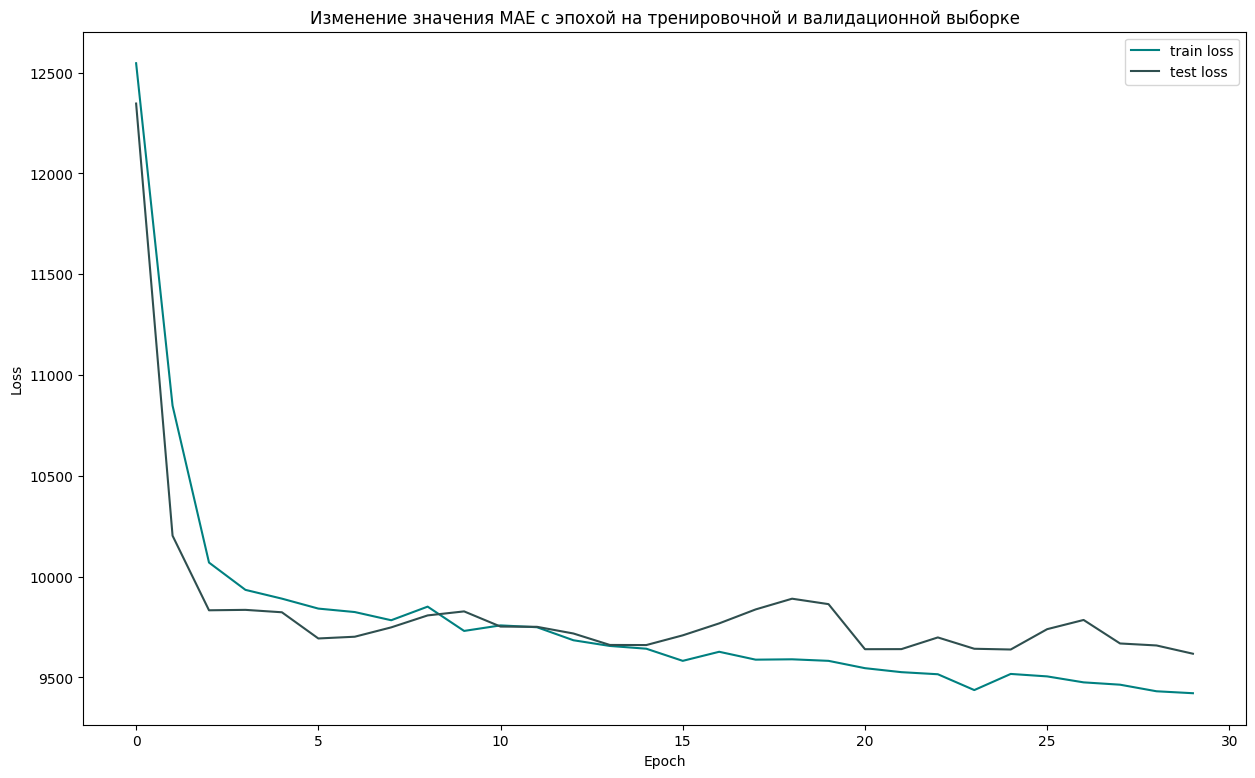

In [ ]:
plt.figure(figsize=(15, 9))
plt.title('Изменение значения MAE с эпохой на тренировочной и валидационной выборке')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(train_losses_bert_a_std)), train_losses_bert_a_std, label = "train loss", color='teal')
plt.plot(range(len(train_losses_bert_a_std)), val_losses_bert_a_std, label = "test loss", color='darkslategray')
plt.legend()
plt.show()

Энкодинг всено

In [ ]:
import lime
import lime.lime_text

In [ ]:
class BertPredictor:
    def __init__(self, model, tokenizer, bert_model, max_length=64):
        self.model = model
        self.tokenizer = tokenizer
        self.bert_model = bert_model
        self.max_length = max_length

    def predict(self, texts):
        encodings = encode_texts(texts, self.tokenizer, max_length=self.max_length)
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)
        with torch.no_grad():
            bert_embeddings = self.bert_model(input_ids, attention_mask=attention_mask).last_hidden_state
            torch.cuda.empty_cache()  # Освобождение GPU памяти после получения эмбеддингов
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(input_ids, attention_mask).squeeze().cpu().numpy()
        torch.cuda.empty_cache()  # Освобождение GPU памяти после предсказаний
        return predictions

predictor = BertPredictor(model, tokenizer, bert_model)
explainer = lime.lime_text.LimeTextExplainer(class_names=['views'])

# Объяснение одной статьи для примера
idx = 0  # индекс статьи для объяснения
exp = explainer.explain_instance(df['text'][idx], predictor.predict, num_features=10, num_samples=500)

exp.show_in_notebook(text=True)

TypeError: RegressionModel.forward() takes 2 positional arguments but 3 were given

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class TextDatasetLSTM(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return self.input_ids.size(0)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

In [ ]:
labels = torch.tensor(df['shows'].values, dtype=torch.float32)
dataset = TextDatasetLSTM(input_ids, attention_mask, labels)
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
class LSTMRegressor(nn.Module):
    def __init__(self, bert_model, hidden_dim, output_dim, num_layers=1, bidirectional=False):
        super(LSTMRegressor, self).__init__()
        self.bert = bert_model
        self.lstm = nn.LSTM(bert_model.config.hidden_size, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids, attention_mask=attention_mask).last_hidden_state
        lstm_output, (hidden, cell) = self.lstm(bert_output)
        hidden = self.dropout(hidden[-1,:,:])
        output = self.fc(hidden)
        return output

In [ ]:
hidden_dim = 128
output_dim = 1
model1 = LSTMRegressor(bert_model, hidden_dim, output_dim).to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model1.train()
    train_loss = 0.0
    for batch in tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * input_ids.size(0)

    train_loss /= len(dataloader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}')

torch.save(model.state_dict(), 'best_lstm_model.pth')

Epoch 1/5: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 1/5, Train Loss: 19151.6992


Epoch 2/5: 100%|██████████| 1/1 [00:00<00:00, 14.69it/s]


Epoch 2/5, Train Loss: 19151.2246


Epoch 3/5: 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]


Epoch 3/5, Train Loss: 19150.7637


Epoch 4/5: 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


Epoch 4/5, Train Loss: 19150.3125


Epoch 5/5: 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]


Epoch 5/5, Train Loss: 19149.7988
